# Tutorial 01:
https://www.kaggle.com/code/devmaxime/image-segmentation-w-fpn-segmentation-model?utm_medium=email&utm_content=nov-18-has-completed-mentoring-session-student&bsft_clkid=e45d8df5-2564-47ee-8689-0aea6ddfeb02&bsft_uid=1bef905a-6b35-4522-87e2-b1cc911f1fab&bsft_mid=de83f75e-f369-4893-b018-fb222bf67e94&bsft_eid=7244055d-47f0-a6f2-c394-7a20ebb3a726&bsft_txnid=39adc76e-6aa6-4b44-a765-8bf83f6d248b&bsft_mime_type=html&bsft_ek=2022-09-16T17%3A55%3A04Z&bsft_aaid=a265d396-7432-4eb2-9c9a-ba5eea75629e&bsft_tv=10

https://medium.com/linkit-intecs/how-to-upload-large-files-to-github-repository-2b1e03723d2

https://www.youtube.com/watch?v=mgX-2_ybqNk&ab_channel=TechnologyforNoobs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from datetime import datetime
#from keras.utils import normalize
#________________________________________#
import tensorflow as tf
from keras_preprocessing import image
import keras
from keras import backend as K
from keras import utils as np_utils
import imgaug as ia
from imgaug import augmenters as iaa
from tensorflow.keras.preprocessing.image import load_img

In [3]:
%env SM_FRAMEWORK=tf.keras
!pip install segmentation_models
import segmentation_models as sm
from segmentation_models import Unet, FPN

env: SM_FRAMEWORK=tf.keras
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.2 MB/s 
Segmentation Models: using `tf.keras` framework.


### Define list of towns considered in the analysis

In [ ]:
# Initial and complete dataset
'''
test_cities = ['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
train_cities = ['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
val_cities = ['frankfurt', 'lindau', 'munster']
'''

"\ntest_cities = ['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']\ntrain_cities = ['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']\nval_cities = ['frankfurt', 'lindau', 'munster']\n"

In [4]:
# Dataset choosen for this project according to hardware capabilities

test_cities = ['monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
train_cities = ['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld']
val_cities = ['frankfurt', 'lindau', 'munster']

### Define resizing, num_classes, batch_size, img_multiplier, epochs

In [5]:
img_size = (128, 256)  # target_size: Either None (default to original size) or tuple of ints (img_height, img_width)
n_classes = 8 
batch_size = 5
imgaug_multiplier = 3

### Create train & val images lists  

In [6]:
train_img_paths = []
train_ann_paths = []

for cities in train_cities:

    train_img_dir = "/content/drive/MyDrive/P_8/P8_Cityscapes_leftImg8bit_trainvaltest/train/" + cities        # leftImg
    train_ann_dir = "/content/drive/MyDrive/P_8/P8_Cityscapes_gtFine_trainvaltest/train/" + cities    # gtFine
    
    train_img_paths = train_img_paths + sorted(
        [
            os.path.join(train_img_dir, fname)
            for fname in os.listdir(train_img_dir)
            if fname.endswith("_leftImg8bit.png")
        ]
    )
    train_ann_paths = train_ann_paths + sorted(
        [
            os.path.join(train_ann_dir, fname)
            for fname in os.listdir(train_ann_dir)
            if fname.endswith("_gtFine_labelIds.png")
        ]
    )

print("Number of train images:", len(train_img_paths))
print("Number of train annotations:", len(train_ann_paths))

val_img_paths = []
val_ann_paths = []

for cities in val_cities:
    val_img_dir = "/content/drive/MyDrive/P_8/P8_Cityscapes_leftImg8bit_trainvaltest/val/" + cities
    val_ann_dir = "/content/drive/MyDrive/P_8/P8_Cityscapes_gtFine_trainvaltest/val/" + cities
    
    val_img_paths = val_img_paths + sorted(
        [
            os.path.join(val_img_dir, fname)
            for fname in os.listdir(val_img_dir)
            if fname.endswith("_leftImg8bit.png")
        ]
    )
    val_ann_paths = val_ann_paths + sorted(
        [
            os.path.join(val_ann_dir, fname)
            for fname in os.listdir(val_ann_dir)
            if fname.endswith("_gtFine_labelIds.png")
        ]
    )

print("Number of val images:", len(val_img_paths))
print("Number of val annotations:", len(val_ann_paths))

test_img_paths = []
test_ann_paths = []

for cities in test_cities:
    test_img_dir = "/content/drive/MyDrive/P_8/P8_Cityscapes_leftImg8bit_trainvaltest/train/" + cities   # Uploaded from train folder
    test_ann_dir = "/content/drive/MyDrive/P_8/P8_Cityscapes_gtFine_trainvaltest/train/" + cities             # Uploaded from train folder
    
    test_img_paths = test_img_paths + sorted(
        [
            os.path.join(test_img_dir, fname)
            for fname in os.listdir(test_img_dir)
            if fname.endswith("_leftImg8bit.png")
        ]
    )
    test_ann_paths = test_ann_paths + sorted(
        [
            os.path.join(test_ann_dir, fname)
            for fname in os.listdir(test_ann_dir)
            if fname.endswith("_gtFine_labelIds.png")
        ]
    )

print("Number of test images:", len(test_img_paths))
print("Number of test annotations:", len(test_ann_paths))

Number of train images: 1817
Number of train annotations: 1817
Number of val images: 500
Number of val annotations: 500
Number of test images: 1158
Number of test annotations: 1158


In [7]:
a = 200
b = a *0.2
# Reducing dataset input according to hardware capabilities
train_img_paths = train_img_paths[1:int(a)]
train_ann_paths = train_ann_paths[1:int(a)]
val_img_paths = val_img_paths[1:int(b)]  # soit 20% du train
val_ann_paths = val_ann_paths[1:int(b)]
test_img_paths = test_img_paths[1:int(b)]
test_ann_paths = test_ann_paths[1:int(b)]

In [ ]:
'''
train_img_paths = train_img_paths[1:10]
train_ann_paths = train_ann_paths[1:10]
val_img_paths = val_img_paths[1:10]
val_ann_paths = val_ann_paths[1:10]
test_img_paths = test_img_paths[1:10]
test_ann_paths = test_ann_paths[1:10]
'''

'\ntrain_img_paths = train_img_paths[1:10]\ntrain_ann_paths = train_ann_paths[1:10]\nval_img_paths = val_img_paths[1:10]\nval_ann_paths = val_ann_paths[1:10]\ntest_img_paths = test_img_paths[1:10]\ntest_ann_paths = test_ann_paths[1:10]\n'

In [8]:
### Define conversion function for image masks lablels 

cats = {
 'void': [0, 1, 2, 3, 4, 5, 6],
 'flat': [7, 8, 9, 10],
 'construction': [11, 12, 13, 14, 15, 16],
 'object': [17, 18, 19, 20],
 'nature': [21, 22],
 'sky': [23],
 'human': [24, 25],
 'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]}
 
def convertCats(x):
    if x in cats['void']:
        return 0
    elif x in cats['flat']:
        return 1
    elif x in cats['construction']:
        return 2
    elif x in cats['object']:
        return 3
    elif x in cats['nature']:
        return 4
    elif x in cats['sky']:
        return 5
    elif x in cats['human']:
        return 6
    elif x in cats['vehicle']:
        return 7
    
convertCats_v = np.vectorize(convertCats)

def preprocessImg(img):
    image_matrix = np.expand_dims(img, 2)
    converted_image = convertCats_v(image_matrix)
    return converted_image

### Define function to generate random parameters for image augmentation
def generateRandomParams(seed):
    np.random.seed(seed)
    angle = np.random.randint(26)
    positive = np.random.randint(2)
    
    if positive == 0:
        angle = angle * -1
        
    crop = np.random.randint(3)
    crop = crop / 10
        
    return angle, crop

In [9]:
class Image_no_aug(tf.keras.utils.Sequence):
    "Helper to iterate over the data (as Numpy arrays)."
    "Put AUG_YES=0 to activate images augmentation"

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        "Returns tuple (input, target) correspond to batch #idx."
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        
        x = np.zeros((self.batch_size * imgaug_multiplier,) + self.img_size + (3,), dtype="float32")        
        for j, path in enumerate(batch_input_img_paths):
            img = image.load_img(path, target_size=self.img_size)
            x[j] = img
        
        y = np.zeros((self.batch_size * imgaug_multiplier,) + self.img_size + (1,), dtype="uint8")  # initial : uint8
        for j, path in enumerate(batch_target_img_paths):
            _img = image.load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = preprocessImg(_img)
            
        return x, y

In [10]:
class Image(tf.keras.utils.Sequence):
    "Helper to iterate over the data (as Numpy arrays)."
    "Put AUG_YES=0 to activate images augmentation"

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        "Returns tuple (input, target) correspond to batch #idx."
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        
        x = np.zeros((self.batch_size * imgaug_multiplier,) + self.img_size + (3,), dtype="uint8")        
        for j, path in enumerate(batch_input_img_paths):
            img = image.load_img(path, target_size=self.img_size)
            x[j] = img
        
        y = np.zeros((self.batch_size * imgaug_multiplier,) + self.img_size + (1,), dtype="float32")  # initial : uint8
        for j, path in enumerate(batch_target_img_paths):
            _img = image.load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = preprocessImg(_img)
            
            # Image AUGMENTATION         
        
        for mul in range(1, imgaug_multiplier):  
            for i in range(0, self.batch_size):
                
                angle, crop = generateRandomParams(i * mul)
                
                seq = iaa.Sequential([                        
                      iaa.Affine(rotate=(angle)),
                      iaa.Crop(percent=(crop)),                    
                    ])
                    
                image_aug = seq(image=x[i])
                x[batch_size * mul + i] = image_aug

                image_aug = seq(image=y[i])
                y[batch_size * mul + i] = image_aug 
        return x, y

In [ ]:
'''
# Generate train and val sequences
train_seq = Image(batch_size, img_size, train_img_paths, train_ann_paths)
val_seq = Image(batch_size, img_size, val_img_paths, val_ann_paths)
'''

'\n# Generate train and val sequences\ntrain_seq = Image(batch_size, img_size, train_img_paths, train_ann_paths)\nval_seq = Image(batch_size, img_size, val_img_paths, val_ann_paths)\n'

In [ ]:
'''
# Check shapes of data
print('train set shape   :',train_seq[0][0].shape)
print('target set shape  :',train_seq[0][1].shape)
#Quick verif
assert train_seq[0][0].shape == (batch_size * imgaug_multiplier, *img_size, 3)
assert train_seq[0][1].shape == (batch_size * imgaug_multiplier, *img_size, 1)
'''

"\n# Check shapes of data\nprint('train set shape   :',train_seq[0][0].shape)\nprint('target set shape  :',train_seq[0][1].shape)\n#Quick verif\nassert train_seq[0][0].shape == (batch_size * imgaug_multiplier, *img_size, 3)\nassert train_seq[0][1].shape == (batch_size * imgaug_multiplier, *img_size, 1)\n"

### Define loss functions 

In [11]:
# loss='sparse_categorical_crossentropy'

def dice_coef_cat(y_true, y_pred, smooth=1e-7):
    '''
    source : https://stackoverflow.com/questions/65125670/implementing-multiclass-dice-loss-function
    Dice coefficient for 8 categories.
    Pass to model as metric during compile statement
    '''
    y_true_f = K.flatten(K.one_hot(K.cast(y_true, 'int32'), num_classes=8)[...,0:])
    y_pred_f = K.flatten(y_pred[...,0:])
    intersect = K.sum(y_true_f * y_pred_f, axis=-1)
    denom = K.sum(y_true_f + y_pred_f, axis=-1)
    return K.mean((2. * intersect / (denom + smooth)))

def dice_coef_cat_loss(y_true, y_pred):
    '''
    Dice loss to minimize. Pass to model as loss during compile statement
    '''
    return 1 - dice_coef_cat(y_true, y_pred)

def jaccard_distance(y_true, y_pred, smooth=1e-7):
    """Jaccard distance for semantic segmentation.
    Also known as the intersection-over-union loss.
    This loss is useful when you have unbalanced numbers of pixels within an image
    because it gives all classes equal weight. However, it is not the defacto
    standard for image segmentation.
    
    The loss has been modified to have a smooth gradient as it converges on zero.
    This has been shifted so it converges on 0 and is smoothed to avoid exploding
    or disappearing gradient.
    Jaccard = (|X & Y|)/ (|X|+ |Y| - |X & Y|)
            = sum(|A*B|)/(sum(|A|)+sum(|B|)-sum(|A*B|))
    # Arguments
        y_true: The ground truth tensor.
        y_pred: The predicted tensor
        smooth: Smoothing factor. Default is 100.
    # Returns
        The Jaccard distance between the two tensors.
    # References
        - [What is a good evaluation measure for semantic segmentation?](
           http://www.bmva.org/bmvc/2013/Papers/paper0032/paper0032.pdf)
    """
    y_true_f = K.flatten(K.one_hot(K.cast(y_true, 'int32'), num_classes=8)[...,0:])
    y_pred_f = K.flatten(y_pred[...,0:])
    
    intersection = K.sum((y_true_f * y_pred_f), axis=-1)
    sum_ = K.sum(y_true_f + y_pred_f, axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

### Prepare Models  :

In [12]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=2,verbose=1)
] # keras.callbacks.ModelCheckpoint("checkpoint.h5", save_best_only=True)
metrics = [sm.metrics.iou_score, 'sparse_categorical_accuracy']

In [13]:
Data_gen =[Image_no_aug,Image]
Models_list=[sm.Unet, sm.FPN]
opt_Adam = tf.keras.optimizers.Adam(learning_rate=0.1)
# opt_SGD = tf.keras.optimizers.SGD(learning_rate=0.1) ## Error : unsupported operand type(s) for -: 'range' and 'int'
optimizer_list = [opt_Adam]
BACKBONE_LIST = ['resnet18','resnet34','vgg16']
loss_list = ['sparse_categorical_crossentropy', dice_coef_cat_loss , jaccard_distance]

In [14]:
# Generate run combinations 
import pandas as pd
i=1 
l=[]
for data in Data_gen:
    for mod in Models_list:
        for backbone in BACKBONE_LIST:   
            for los in loss_list:    
                l.append({
                    'run':i,
                    'Data_gen':data.__name__,
                    'Model':mod.__name__,
                    'BACKBONE':backbone,
                    'Loss':los
                })
                i=i+1
Runs = pd.DataFrame(l)
Runs.head()

,run,Data_gen,Model,BACKBONE,Loss
0,1,Image_no_aug,Unet,resnet18,sparse_categorical_crossentropy
1,2,Image_no_aug,Unet,resnet18,<function dice_coef_cat_loss at 0x7f003d3d6050>
2,3,Image_no_aug,Unet,resnet18,<function jaccard_distance at 0x7f003d3d6170>
3,4,Image_no_aug,Unet,resnet34,sparse_categorical_crossentropy
4,5,Image_no_aug,Unet,resnet34,<function dice_coef_cat_loss at 0x7f003d3d6050>


# Runs : NO AUG

In [15]:
# Generating data sequences for no_aug cases
test_seq = Image_no_aug(batch_size, img_size, test_img_paths, test_ann_paths)

# Generate train and val sequences
train_seq = Image_no_aug(batch_size, img_size, train_img_paths, train_ann_paths)
val_seq = Image_no_aug(batch_size, img_size, val_img_paths, val_ann_paths)
print('train set shape   :',train_seq[0][0].shape)
print('target set shape  :',train_seq[0][1].shape)
print('-----------------------------------------')
#Quick verif
assert train_seq[0][0].shape == (batch_size * imgaug_multiplier, *img_size, 3)
assert train_seq[0][1].shape == (batch_size * imgaug_multiplier, *img_size, 1)

train set shape   : (15, 128, 256, 3)
target set shape  : (15, 128, 256, 1)
-----------------------------------------


In [16]:
runs_no_aug = Runs[Runs['Data_gen']=='Image_no_aug']
runs_no_aug.head()

,run,Data_gen,Model,BACKBONE,Loss
0,1,Image_no_aug,Unet,resnet18,sparse_categorical_crossentropy
1,2,Image_no_aug,Unet,resnet18,<function dice_coef_cat_loss at 0x7f003d3d6050>
2,3,Image_no_aug,Unet,resnet18,<function jaccard_distance at 0x7f003d3d6170>
3,4,Image_no_aug,Unet,resnet34,sparse_categorical_crossentropy
4,5,Image_no_aug,Unet,resnet34,<function dice_coef_cat_loss at 0x7f003d3d6050>


### Run 01

--------------------------------------------------------------------------------------------------------
run                                       1
Data_gen                       Image_no_aug
Model                                  Unet
BACKBONE                           resnet18
Loss        sparse_categorical_crossentropy
Name: 0, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   1      Data generator  : NO_AUG
Model : Unet   BACKBONE  : resnet18   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 30s 689ms/step - loss: 0.8037 - iou_score: 0.1384 - sparse_categorical_accuracy: 0.7575 - val_loss: 37020057600.0000 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 0.0514
Epoch 2/15
39/39 [==============================] - 26s 676ms/step - loss: 0.54

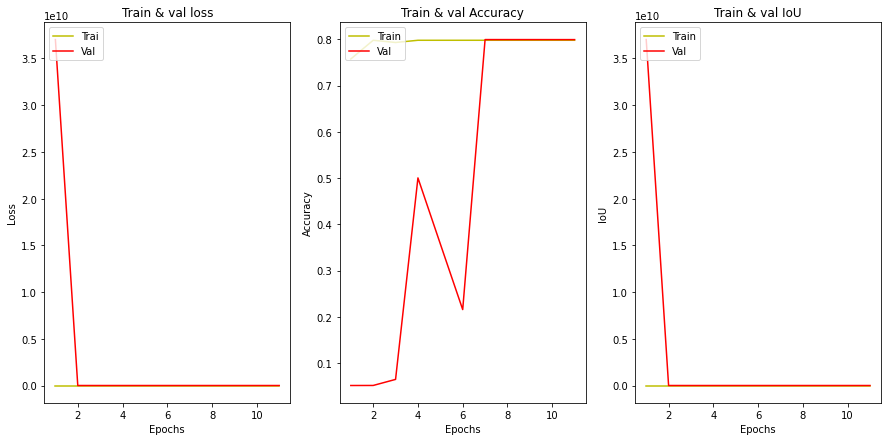

In [ ]:
# Run N01 :
x = runs_no_aug.iloc[0]
mod = sm.Unet
backbone = 'resnet18'
los = 'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)


# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(runs_no_aug.iloc[0])
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time)) 
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()                                        

In [ ]:
del model, backbone, los

### Run 02

--------------------------------------------------------------------------------------------------------
run                                                       2
Data_gen                                       Image_no_aug
Model                                                  Unet
BACKBONE                                           resnet18
Loss        <function dice_coef_cat_loss at 0x7f5bc24df050>
Name: 1, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   2      Data generator  : NO_AUG
Model : Unet   BACKBONE  : resnet18   Loss_function  : <function dice_coef_cat_loss at 0x7f5bc24df050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 30s 700ms/step - loss: 0.3255 - iou_score: 0.0946 - sparse_categorical_accuracy: 0.6815 - val_loss: 0.2875 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 

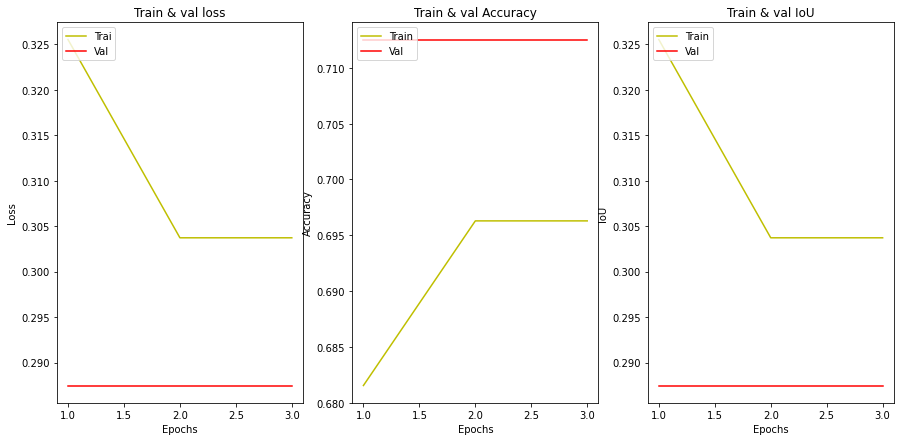

In [ ]:
# Run N02 :
x = runs_no_aug.iloc[1]
mod = sm.Unet
backbone = 'resnet18'
los = dice_coef_cat_loss

preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(runs_no_aug.iloc[1])
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))  
print('Epochs run total :',len(history.history['loss']))               
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 03

--------------------------------------------------------------------------------------------------------
run                                                     3
Data_gen                                     Image_no_aug
Model                                                Unet
BACKBONE                                         resnet18
Loss        <function jaccard_distance at 0x7f5bc24df170>
Name: 2, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   3      Data generator  : NO_AUG
Model : Unet   BACKBONE  : resnet18   Loss_function  : <function jaccard_distance at 0x7f5bc24df170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 31s 711ms/step - loss: 6.8854e-08 - iou_score: 0.1228 - sparse_categorical_accuracy: 0.5786 - val_loss: 8.5788e-08 - val_iou_score: 0.1219 - val_sparse_categorical_accuracy: 0.79

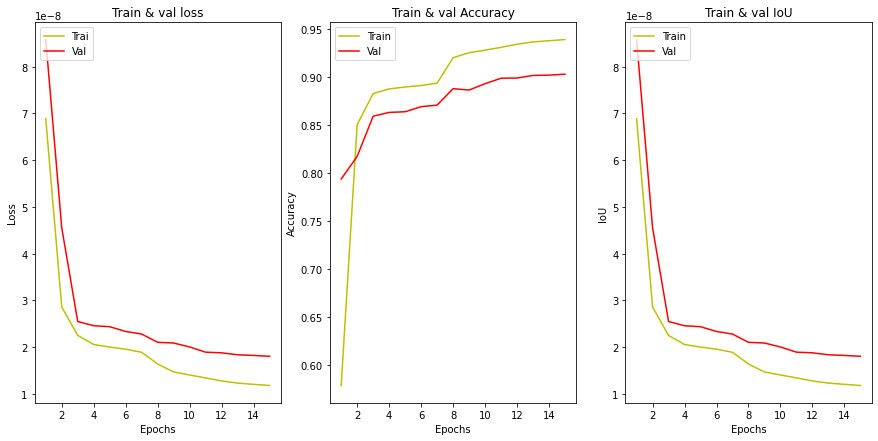

In [ ]:
x = runs_no_aug.iloc[2]
mod = sm.Unet
backbone = 'resnet18'
los = jaccard_distance
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))   
print('Epochs run total :',len(history.history['loss']))              
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 04

--------------------------------------------------------------------------------------------------------
run                                       4
Data_gen                       Image_no_aug
Model                                  Unet
BACKBONE                           resnet34
Loss        sparse_categorical_crossentropy
Name: 3, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   4      Data generator  : NO_AUG
Model : Unet   BACKBONE  : resnet34   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 712ms/step - loss: 0.8028 - iou_score: 0.1368 - sparse_categorical_accuracy: 0.7580 - val_loss: 596767288959434752.0000 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 0.1327
Epoch 2/15
39/39 [==============================] - 26s 676ms/step - los

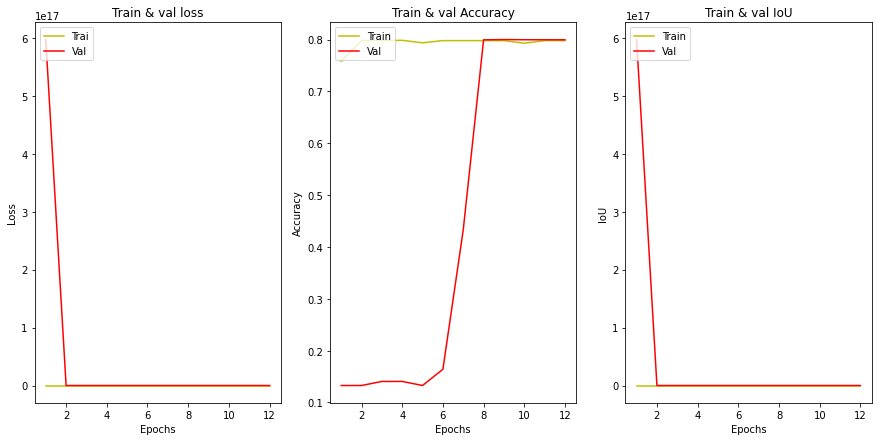

In [ ]:
x = runs_no_aug.iloc[3]
mod = sm.Unet
backbone = 'resnet34'
los = 'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time)) 
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 05

--------------------------------------------------------------------------------------------------------
run                                                       5
Data_gen                                       Image_no_aug
Model                                                  Unet
BACKBONE                                           resnet34
Loss        <function dice_coef_cat_loss at 0x7f5bc24df050>
Name: 4, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   5      Data generator  : NO_AUG
Model : Unet   BACKBONE  : resnet34   Loss_function  : <function dice_coef_cat_loss at 0x7f5bc24df050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 33s 715ms/step - loss: 0.2367 - iou_score: 0.1982 - sparse_categorical_accuracy: 0.7666 - val_loss: 0.8673 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 

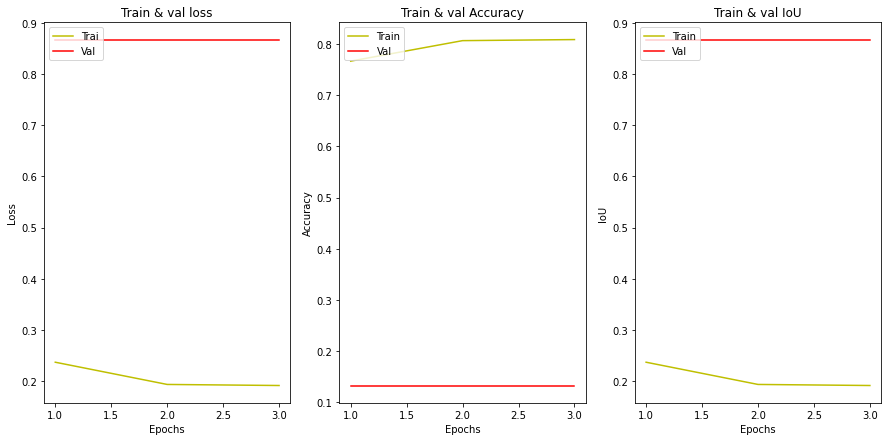

In [ ]:
x = runs_no_aug.iloc[4]
mod = sm.Unet
backbone = 'resnet34'
los = dice_coef_cat_loss
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))    
print('Epochs run total :',len(history.history['loss']))             
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 06

--------------------------------------------------------------------------------------------------------
run                                                     6
Data_gen                                     Image_no_aug
Model                                                Unet
BACKBONE                                         resnet34
Loss        <function jaccard_distance at 0x7f5bc24df170>
Name: 5, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   6      Data generator  : NO_AUG
Model : Unet   BACKBONE  : resnet34   Loss_function  : <function jaccard_distance at 0x7f5bc24df170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 33s 717ms/step - loss: 6.3555e-08 - iou_score: 0.1337 - sparse_categorical_accuracy: 0.6859 - val_loss: 8.8655e-08 - val_iou_score: 0.1431 - val_sparse_categorical_accuracy: 0.26

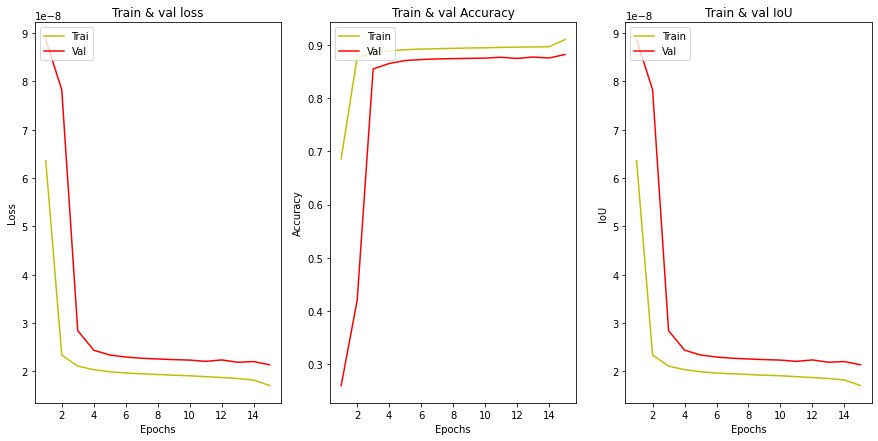

In [ ]:
x = runs_no_aug.iloc[5]
mod = sm.Unet
backbone = 'resnet34'
los = jaccard_distance
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time)) 
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 07

--------------------------------------------------------------------------------------------------------
run                                       7
Data_gen                       Image_no_aug
Model                                  Unet
BACKBONE                              vgg16
Loss        sparse_categorical_crossentropy
Name: 6, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   7      Data generator  : NO_AUG
Model : Unet   BACKBONE  : vgg16   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 30s 733ms/step - loss: 1.3055 - iou_score: 0.1390 - sparse_categorical_accuracy: 0.7297 - val_loss: 1715.0808 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 0.0118
Epoch 2/15
39/39 [==============================] - 28s 712ms/step - loss: 0.5517 - iou_s

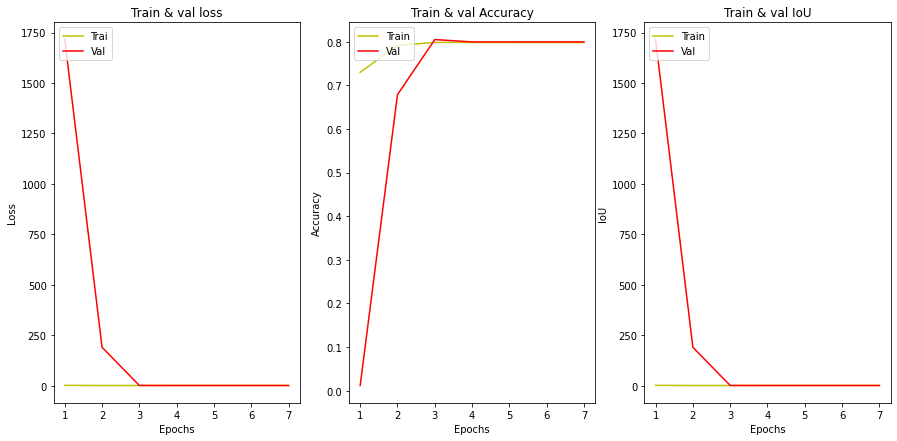

In [ ]:
x = runs_no_aug.iloc[6]
mod = sm.Unet
backbone = 'vgg16'
los = 'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))     
print('Epochs run total :',len(history.history['loss']))            
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 08

--------------------------------------------------------------------------------------------------------
run                                                       8
Data_gen                                       Image_no_aug
Model                                                  Unet
BACKBONE                                              vgg16
Loss        <function dice_coef_cat_loss at 0x7f5bc24df050>
Name: 7, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   8      Data generator  : NO_AUG
Model : Unet   BACKBONE  : vgg16   Loss_function  : <function dice_coef_cat_loss at 0x7f5bc24df050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 30s 726ms/step - loss: 0.2546 - iou_score: 0.2086 - sparse_categorical_accuracy: 0.7591 - val_loss: 0.8483 - val_iou_score: 0.0912 - val_sparse_categorical_accuracy: 0.1

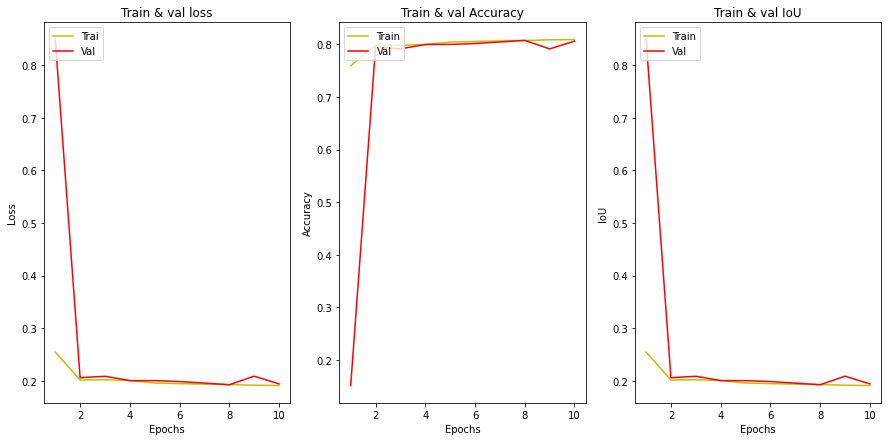

In [ ]:
x = runs_no_aug.iloc[7]
mod = sm.Unet
backbone = 'vgg16'
los =  dice_coef_cat_loss
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time)) 
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 09

--------------------------------------------------------------------------------------------------------
run                                                     9
Data_gen                                     Image_no_aug
Model                                                Unet
BACKBONE                                            vgg16
Loss        <function jaccard_distance at 0x7f5bc24df170>
Name: 8, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   9      Data generator  : NO_AUG
Model : Unet   BACKBONE  : vgg16   Loss_function  : <function jaccard_distance at 0x7f5bc24df170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 30s 729ms/step - loss: 8.3771e-08 - iou_score: 0.1227 - sparse_categorical_accuracy: 0.4627 - val_loss: 7.4281e-08 - val_iou_score: 0.1393 - val_sparse_categorical_accuracy: 0.7504


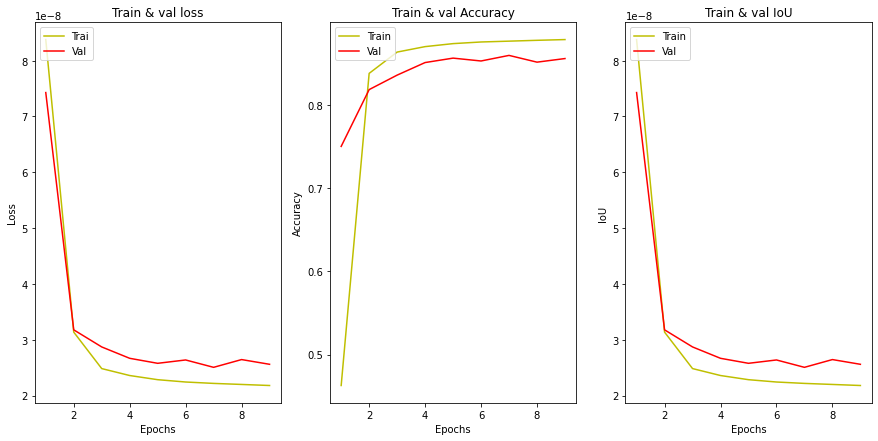

In [ ]:
x = runs_no_aug.iloc[8]
mod = sm.Unet
backbone = 'vgg16'
los =   jaccard_distance
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                 
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 10

--------------------------------------------------------------------------------------------------------
run                                      10
Data_gen                       Image_no_aug
Model                                   FPN
BACKBONE                           resnet18
Loss        sparse_categorical_crossentropy
Name: 9, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   10      Data generator  : NO_AUG
Model : FPN   BACKBONE  : resnet18   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 735ms/step - loss: 4.8974 - iou_score: 0.1294 - sparse_categorical_accuracy: 0.7386 - val_loss: 35905531904.0000 - val_iou_score: 0.0963 - val_sparse_categorical_accuracy: 0.2015
Epoch 2/15
39/39 [==============================] - 28s 703ms/step - loss: 0.85

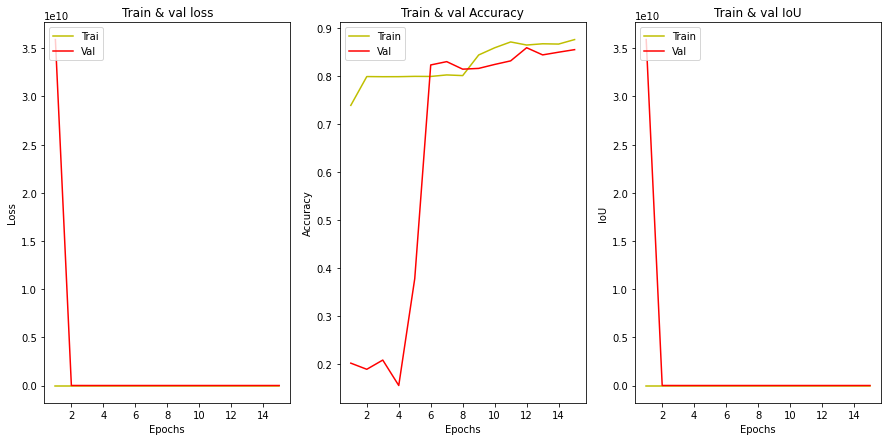

In [ ]:
x = runs_no_aug.iloc[9]
mod = sm.FPN
backbone = 'resnet18'
los =   'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                 
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 11

--------------------------------------------------------------------------------------------------------
run                                                      11
Data_gen                                       Image_no_aug
Model                                                   FPN
BACKBONE                                           resnet18
Loss        <function dice_coef_cat_loss at 0x7f5bc24df050>
Name: 10, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   11      Data generator  : NO_AUG
Model : FPN   BACKBONE  : resnet18   Loss_function  : <function dice_coef_cat_loss at 0x7f5bc24df050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 741ms/step - loss: 0.3174 - iou_score: 0.0941 - sparse_categorical_accuracy: 0.6873 - val_loss: 0.2875 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy:

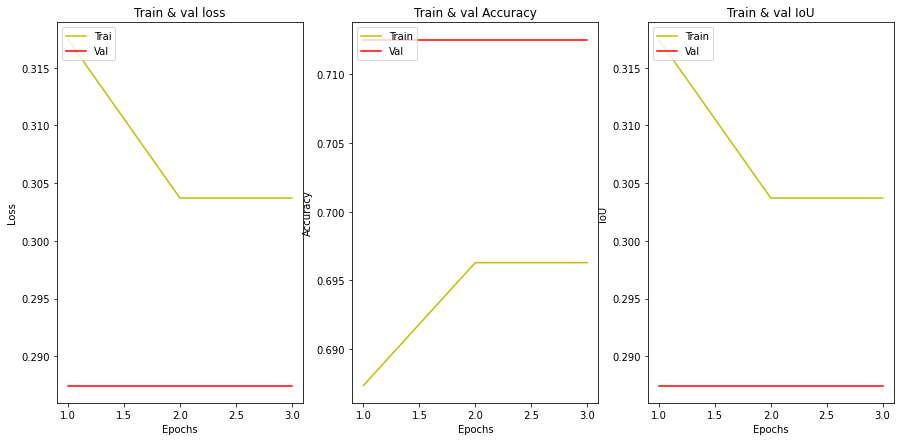

In [ ]:
x = runs_no_aug.iloc[10]
mod = sm.FPN
backbone = 'resnet18'
los =   dice_coef_cat_loss   
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                 
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 12

--------------------------------------------------------------------------------------------------------
run                                                    12
Data_gen                                     Image_no_aug
Model                                                 FPN
BACKBONE                                         resnet18
Loss        <function jaccard_distance at 0x7f5bc24df170>
Name: 11, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   12      Data generator  : NO_AUG
Model : FPN   BACKBONE  : resnet18   Loss_function  : <function jaccard_distance at 0x7f5bc24df170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 729ms/step - loss: 3.8593e-08 - iou_score: 0.1644 - sparse_categorical_accuracy: 0.7779 - val_loss: 8.8957e-08 - val_iou_score: 0.1080 - val_sparse_categorical_accuracy: 0.1

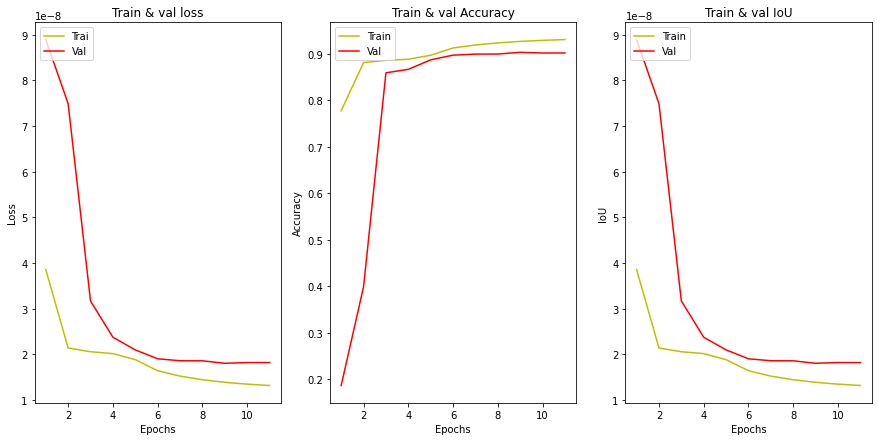

In [ ]:
x = runs_no_aug.iloc[11]
mod = sm.FPN
backbone = 'resnet18'
los =   jaccard_distance  
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 13

--------------------------------------------------------------------------------------------------------
run                                      13
Data_gen                       Image_no_aug
Model                                   FPN
BACKBONE                           resnet34
Loss        sparse_categorical_crossentropy
Name: 12, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   13      Data generator  : NO_AUG
Model : FPN   BACKBONE  : resnet34   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 34s 753ms/step - loss: 3.4930 - iou_score: 0.1061 - sparse_categorical_accuracy: 0.6580 - val_loss: 134488025726976.0000 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 0.7125
Epoch 2/15
39/39 [==============================] - 28s 711ms/step - loss:

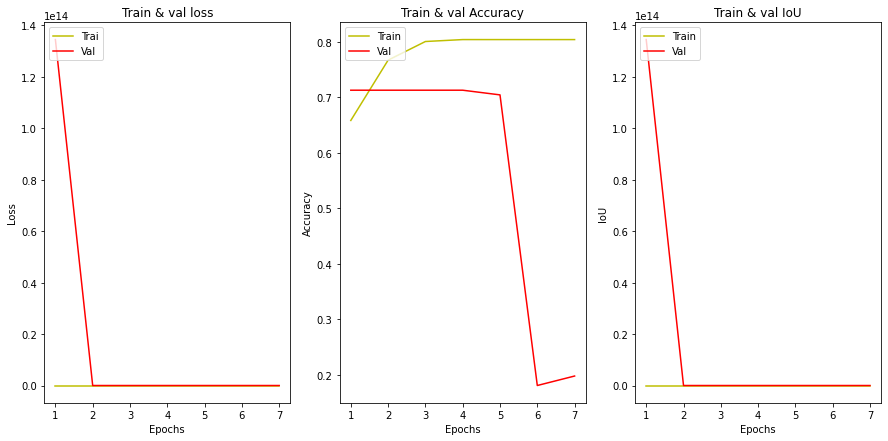

In [ ]:
x = runs_no_aug.iloc[12]
mod = sm.FPN
backbone = 'resnet34'
los =   'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 14

--------------------------------------------------------------------------------------------------------
run                                                      14
Data_gen                                       Image_no_aug
Model                                                   FPN
BACKBONE                                           resnet34
Loss        <function dice_coef_cat_loss at 0x7f5bc24df050>
Name: 13, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   14      Data generator  : NO_AUG
Model : FPN   BACKBONE  : resnet34   Loss_function  : <function dice_coef_cat_loss at 0x7f5bc24df050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 34s 749ms/step - loss: 0.2199 - iou_score: 0.2401 - sparse_categorical_accuracy: 0.7784 - val_loss: 0.8673 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy:

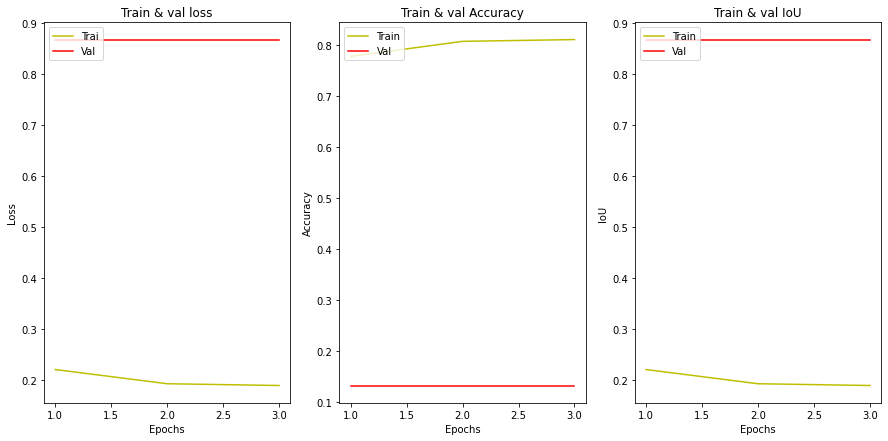

In [ ]:
x = runs_no_aug.iloc[13]
mod = sm.FPN
backbone = 'resnet34'
los =   dice_coef_cat_loss
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 15

--------------------------------------------------------------------------------------------------------
run                                                    15
Data_gen                                     Image_no_aug
Model                                                 FPN
BACKBONE                                         resnet34
Loss        <function jaccard_distance at 0x7f5bc24df170>
Name: 14, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   15      Data generator  : NO_AUG
Model : FPN   BACKBONE  : resnet34   Loss_function  : <function jaccard_distance at 0x7f5bc24df170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 35s 751ms/step - loss: 4.2645e-08 - iou_score: 0.1675 - sparse_categorical_accuracy: 0.7245 - val_loss: 8.8656e-08 - val_iou_score: 0.1109 - val_sparse_categorical_accuracy: 0.1

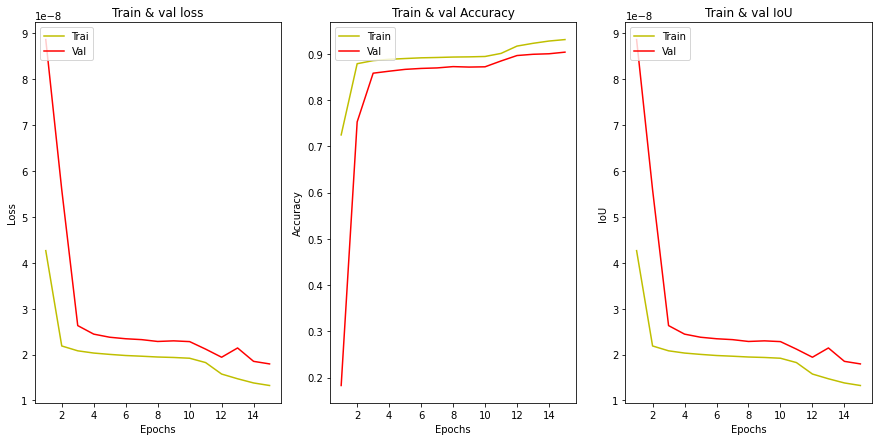

In [ ]:
x = runs_no_aug.iloc[14]
mod = sm.FPN
backbone = 'resnet34'
los =   jaccard_distance
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 16

--------------------------------------------------------------------------------------------------------
run                                      16
Data_gen                       Image_no_aug
Model                                   FPN
BACKBONE                              vgg16
Loss        sparse_categorical_crossentropy
Name: 15, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   16      Data generator  : NO_AUG
Model : FPN   BACKBONE  : vgg16   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 31s 742ms/step - loss: nan - iou_score: nan - sparse_categorical_accuracy: 0.6801 - val_loss: nan - val_iou_score: nan - val_sparse_categorical_accuracy: 0.7125
Epoch 2/15
39/39 [==============================] - 28s 719ms/step - loss: nan - iou_score: nan - spars

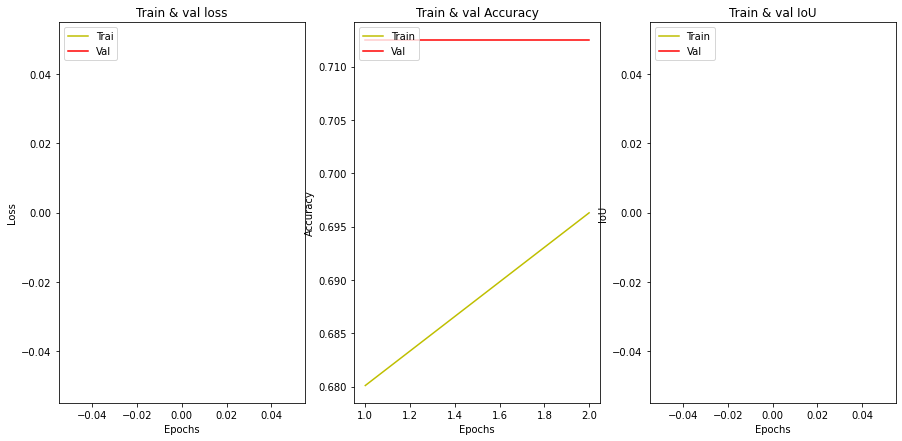

In [ ]:
x = runs_no_aug.iloc[15]
mod = sm.FPN
backbone = 'vgg16'
los =   'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))               
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 17

--------------------------------------------------------------------------------------------------------
run                                                      17
Data_gen                                       Image_no_aug
Model                                                   FPN
BACKBONE                                              vgg16
Loss        <function dice_coef_cat_loss at 0x7f5bc24df050>
Name: 16, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   17      Data generator  : NO_AUG
Model : FPN   BACKBONE  : vgg16   Loss_function  : <function dice_coef_cat_loss at 0x7f5bc24df050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 31s 743ms/step - loss: nan - iou_score: nan - sparse_categorical_accuracy: 0.6827 - val_loss: nan - val_iou_score: nan - val_sparse_categorical_accuracy: 0.7125
Epoch 2

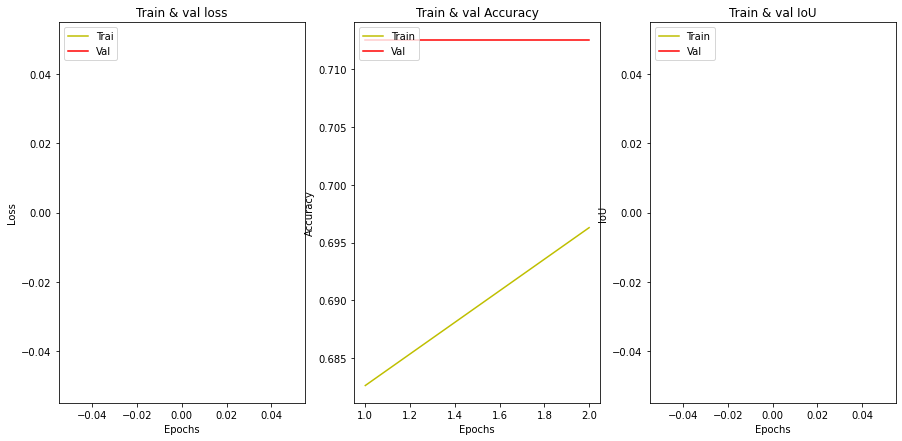

In [ ]:
x = runs_no_aug.iloc[16]
mod = sm.FPN
backbone = 'vgg16'
los =   dice_coef_cat_loss
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone

### Run 18

--------------------------------------------------------------------------------------------------------
run                                                    18
Data_gen                                     Image_no_aug
Model                                                 FPN
BACKBONE                                            vgg16
Loss        <function jaccard_distance at 0x7f5bc24df170>
Name: 17, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   18      Data generator  : NO_AUG
Model : FPN   BACKBONE  : vgg16   Loss_function  : <function jaccard_distance at 0x7f5bc24df170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 757ms/step - loss: 3.6210e-08 - iou_score: 0.1569 - sparse_categorical_accuracy: 0.8159 - val_loss: 2.7045e-08 - val_iou_score: 0.1742 - val_sparse_categorical_accuracy: 0.8747

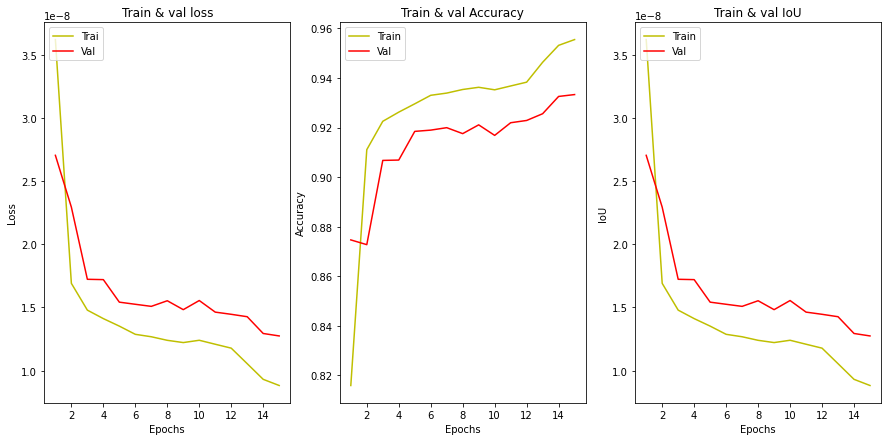

In [ ]:
x = runs_no_aug.iloc[17]
mod = sm.FPN
backbone = 'vgg16'
los =   jaccard_distance
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','NO_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))               
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [ ]:
del model,los,backbone,train_seq,val_seq

# Runs : WITH AUG

In [17]:
runs_aug = Runs[Runs['Data_gen']=='Image']
runs_aug.head()

,run,Data_gen,Model,BACKBONE,Loss
18,19,Image,Unet,resnet18,sparse_categorical_crossentropy
19,20,Image,Unet,resnet18,<function dice_coef_cat_loss at 0x7f003d3d6050>
20,21,Image,Unet,resnet18,<function jaccard_distance at 0x7f003d3d6170>
21,22,Image,Unet,resnet34,sparse_categorical_crossentropy
22,23,Image,Unet,resnet34,<function dice_coef_cat_loss at 0x7f003d3d6050>


In [18]:
# Generating data sequences for no_aug cases
test_seq = Image_no_aug(batch_size, img_size, test_img_paths, test_ann_paths)

# Generate train and val sequences
train_seq = Image(batch_size, img_size, train_img_paths, train_ann_paths)
val_seq = Image_no_aug(batch_size, img_size, val_img_paths, val_ann_paths)   # No augumentation applied on val dataset
print('train set shape   :',train_seq[0][0].shape)
print('target set shape  :',train_seq[0][1].shape)
print('-----------------------------------------')
#Quick verif
assert train_seq[0][0].shape == (batch_size * imgaug_multiplier, *img_size, 3)
assert train_seq[0][1].shape == (batch_size * imgaug_multiplier, *img_size, 1)

train set shape   : (15, 128, 256, 3)
target set shape  : (15, 128, 256, 1)
-----------------------------------------


In [19]:
runs_aug.iloc[0][0]

19

### Run 01 -AUG

--------------------------------------------------------------------------------------------------------
run                                      19
Data_gen                              Image
Model                                  Unet
BACKBONE                           resnet18
Loss        sparse_categorical_crossentropy
Name: 18, dtype: object
--------------------------------------------------------------------------------------------------------
44920640/44920640 [==============================] - 1s 0us/step
Run N:   19      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : resnet18   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 112s 2s/step - loss: 1.4703 - iou_score: 0.1423 - sparse_categorical_accuracy: 0.4791 - val_loss: 2218387456.0000 - val_iou_score: 0.0902 - val_sparse_categorical_accuracy: 0.1405
Epoch 2/15
39

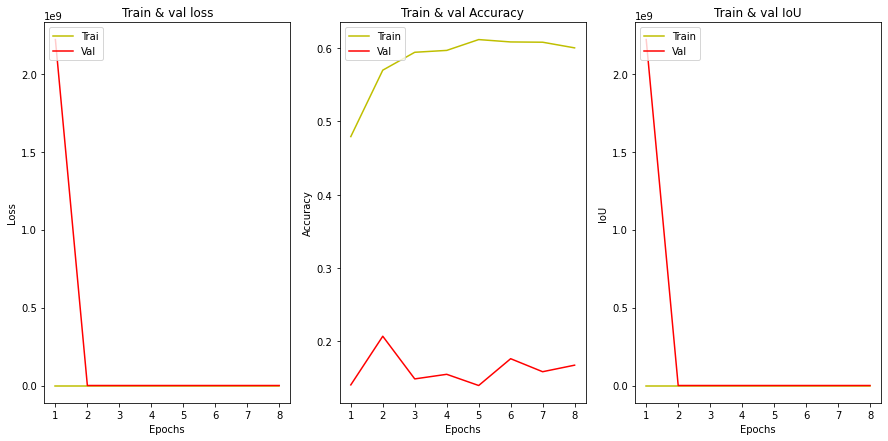

In [20]:
mod = sm.Unet
backbone = 'resnet18'
los = 'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
#______________________________________________________________________________________________#
# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(runs_aug.iloc[0])
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',runs_aug.iloc[0][0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time)) 
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()                                        

In [21]:
del model,los,backbone

### Run 02 -AUG

--------------------------------------------------------------------------------------------------------
run                                                      20
Data_gen                                              Image
Model                                                  Unet
BACKBONE                                           resnet18
Loss        <function dice_coef_cat_loss at 0x7f003d3d6050>
Name: 19, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   20      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : resnet18   Loss_function  : <function dice_coef_cat_loss at 0x7f003d3d6050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 726ms/step - loss: 0.4240 - iou_score: 0.2070 - sparse_categorical_accuracy: 0.5541 - val_loss: 0.8673 - val_iou_score: 0.0895 - val_sparse_categorical_accura

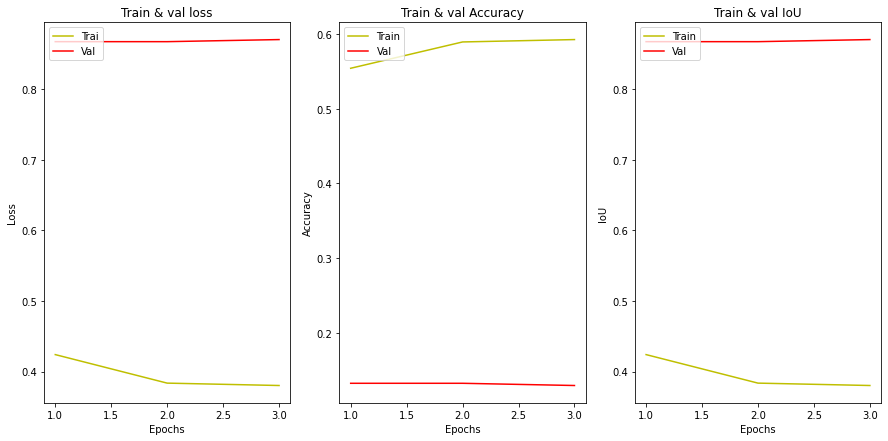

In [22]:
mod = sm.Unet
backbone = 'resnet18'
los = dice_coef_cat_loss
preprocess_input = sm.get_preprocessing(backbone)
#______________________________________________________________________________________________#
# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(runs_aug.iloc[1])
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',runs_aug.iloc[1][0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))  
print('Epochs run total :',len(history.history['loss']))               
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [23]:
del model,los,backbone

### Run 03 -AUG

--------------------------------------------------------------------------------------------------------
run                                                    21
Data_gen                                            Image
Model                                                Unet
BACKBONE                                         resnet18
Loss        <function jaccard_distance at 0x7f003d3d6170>
Name: 20, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   21      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : resnet18   Loss_function  : <function jaccard_distance at 0x7f003d3d6170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 33s 760ms/step - loss: 9.0639e-08 - iou_score: 0.1352 - sparse_categorical_accuracy: 0.2278 - val_loss: 9.2706e-08 - val_iou_score: 0.1189 - val_sparse_categorical_accuracy: 

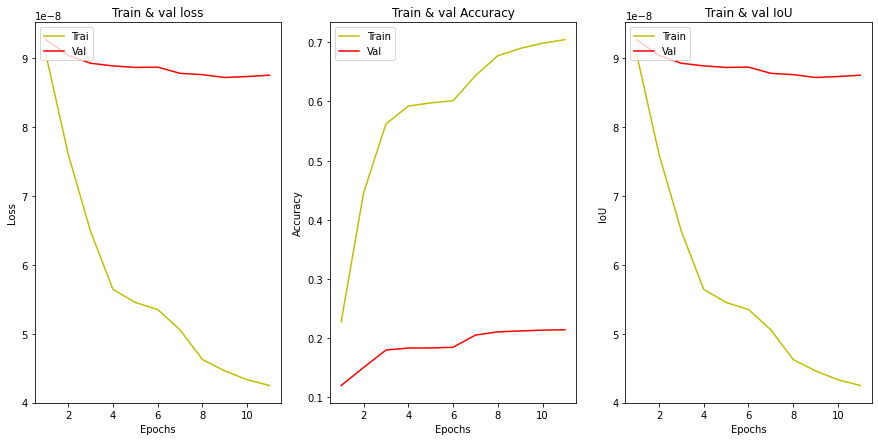

In [24]:
x = runs_aug.iloc[2]
mod = sm.Unet
backbone = 'resnet18'
los = jaccard_distance
preprocess_input = sm.get_preprocessing(backbone)
#______________________________________________________________________________________________#

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))   
print('Epochs run total :',len(history.history['loss']))              
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [25]:
del model,los,backbone

### Run 04 -AUG

--------------------------------------------------------------------------------------------------------
run                                      22
Data_gen                              Image
Model                                  Unet
BACKBONE                           resnet34
Loss        sparse_categorical_crossentropy
Name: 21, dtype: object
--------------------------------------------------------------------------------------------------------
85521592/85521592 [==============================] - 3s 0us/step
Run N:   22      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : resnet34   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 34s 766ms/step - loss: 1.9644 - iou_score: 0.1513 - sparse_categorical_accuracy: 0.3517 - val_loss: 39547835523268608.0000 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 0.1327
Epoc

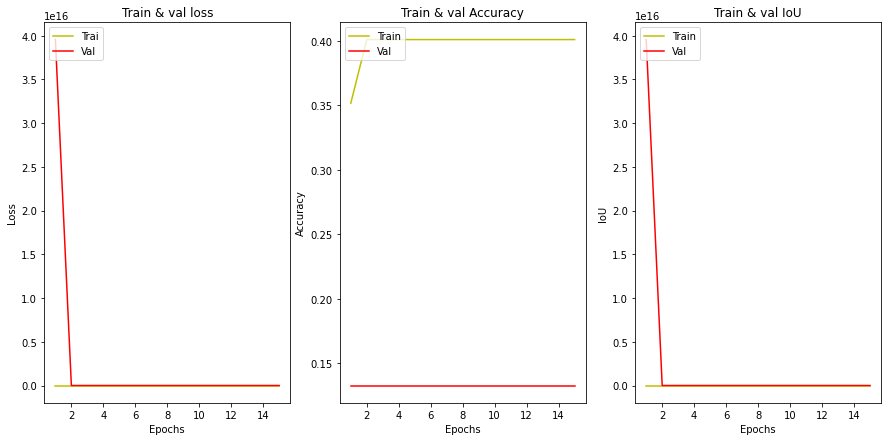

In [26]:
x = runs_aug.iloc[3]
mod = sm.Unet
backbone = 'resnet34'
los = 'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time)) 
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [27]:
del model,los,backbone

### Run 05 -AUG

--------------------------------------------------------------------------------------------------------
run                                                      23
Data_gen                                              Image
Model                                                  Unet
BACKBONE                                           resnet34
Loss        <function dice_coef_cat_loss at 0x7f003d3d6050>
Name: 22, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   23      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : resnet34   Loss_function  : <function dice_coef_cat_loss at 0x7f003d3d6050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 35s 737ms/step - loss: 0.5985 - iou_score: 0.2775 - sparse_categorical_accuracy: 0.3918 - val_loss: 0.8673 - val_iou_score: 0.0895 - val_sparse_categorical_accura

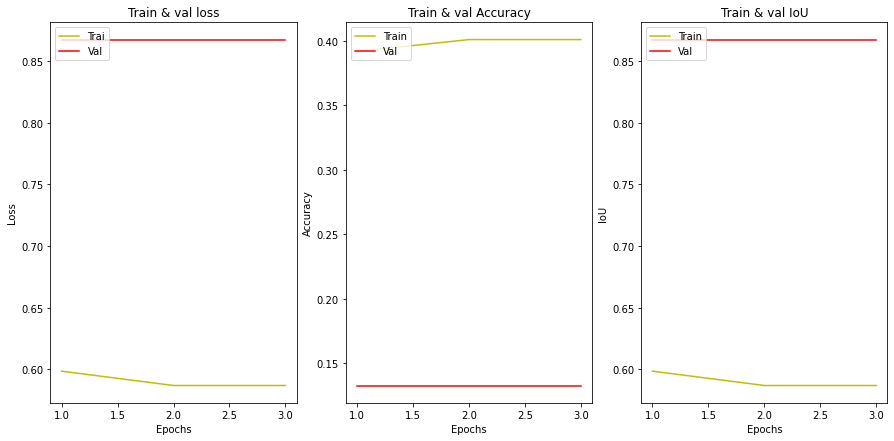

In [28]:
x = runs_aug.iloc[4]
mod = sm.Unet
backbone = 'resnet34'
los = dice_coef_cat_loss

preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))    
print('Epochs run total :',len(history.history['loss']))             
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [29]:
del model,los,backbone

### Run 06 -AUG

--------------------------------------------------------------------------------------------------------
run                                                    24
Data_gen                                            Image
Model                                                Unet
BACKBONE                                         resnet34
Loss        <function jaccard_distance at 0x7f003d3d6170>
Name: 23, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   24      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : resnet34   Loss_function  : <function jaccard_distance at 0x7f003d3d6170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 35s 776ms/step - loss: 9.0023e-08 - iou_score: 0.1365 - sparse_categorical_accuracy: 0.2681 - val_loss: 9.3200e-08 - val_iou_score: 0.1196 - val_sparse_categorical_accuracy: 

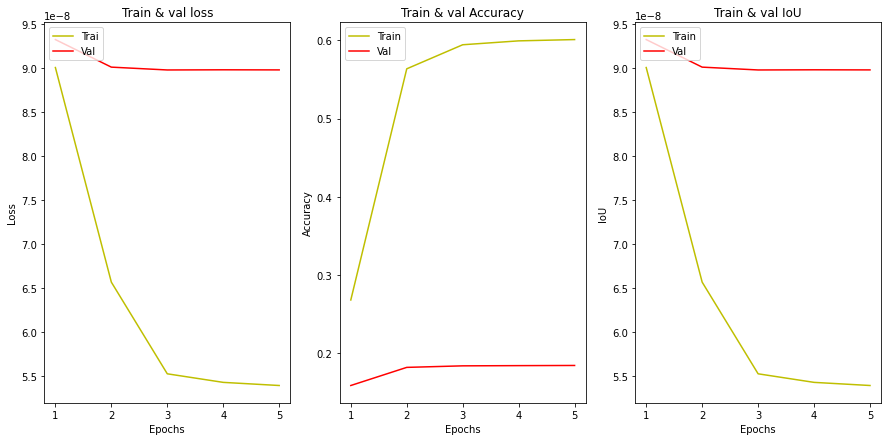

In [30]:
x = runs_aug.iloc[5]
mod = sm.Unet
backbone = 'resnet34'
los = jaccard_distance

preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time)) 
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [31]:
del model,los,backbone

### Run 07 -AUG

--------------------------------------------------------------------------------------------------------
run                                      25
Data_gen                              Image
Model                                  Unet
BACKBONE                              vgg16
Loss        sparse_categorical_crossentropy
Name: 24, dtype: object
--------------------------------------------------------------------------------------------------------
58889256/58889256 [==============================] - 1s 0us/step
Run N:   25      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : vgg16   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 36s 735ms/step - loss: 1.9664 - iou_score: 0.1517 - sparse_categorical_accuracy: 0.3770 - val_loss: 0.6262 - val_iou_score: 0.1436 - val_sparse_categorical_accuracy: 0.7943
Epoch 2/15
39/39 [=====

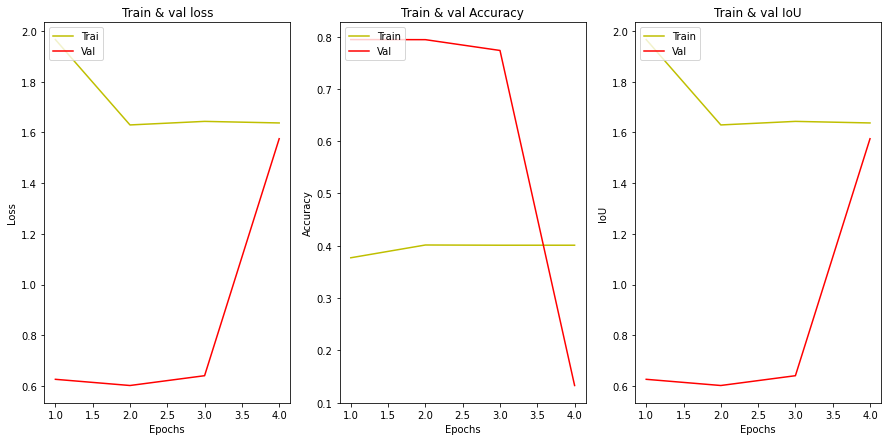

In [32]:
x = runs_aug.iloc[6]
mod = sm.Unet
backbone = 'vgg16'
los = 'sparse_categorical_crossentropy'

preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))     
print('Epochs run total :',len(history.history['loss']))            
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [33]:
del model,los,backbone

### Run 08 -AUG

--------------------------------------------------------------------------------------------------------
run                                                      26
Data_gen                                              Image
Model                                                  Unet
BACKBONE                                              vgg16
Loss        <function dice_coef_cat_loss at 0x7f003d3d6050>
Name: 25, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   26      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : vgg16   Loss_function  : <function dice_coef_cat_loss at 0x7f003d3d6050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 35s 850ms/step - loss: 0.5430 - iou_score: 0.1740 - sparse_categorical_accuracy: 0.4380 - val_loss: 0.9433 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy:

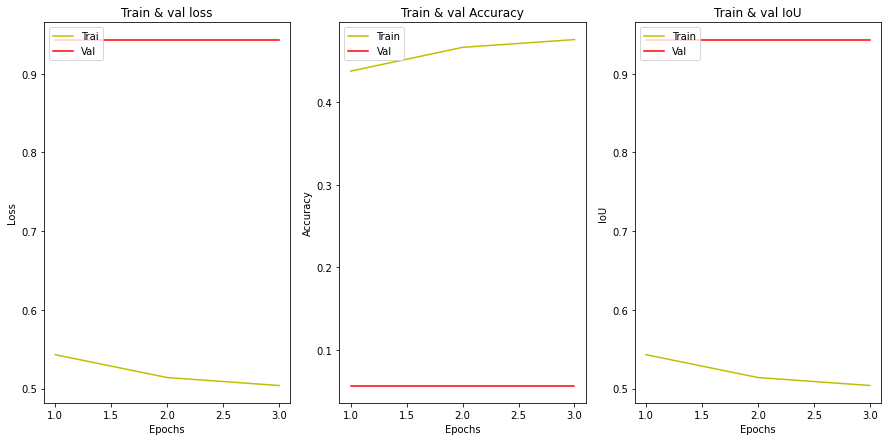

In [34]:
x = runs_aug.iloc[7]
mod = sm.Unet
backbone = 'vgg16'
los =  dice_coef_cat_loss

preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time)) 
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [35]:
del model,los,backbone

### Run 09 -AUG

--------------------------------------------------------------------------------------------------------
run                                                    27
Data_gen                                            Image
Model                                                Unet
BACKBONE                                            vgg16
Loss        <function jaccard_distance at 0x7f003d3d6170>
Name: 26, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   27      Data generator  : WITH_AUG
Model : Unet   BACKBONE  : vgg16   Loss_function  : <function jaccard_distance at 0x7f003d3d6170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 772ms/step - loss: 8.3666e-08 - iou_score: 0.1381 - sparse_categorical_accuracy: 0.3792 - val_loss: 9.4271e-08 - val_iou_score: 0.1331 - val_sparse_categorical_accuracy: 0.0

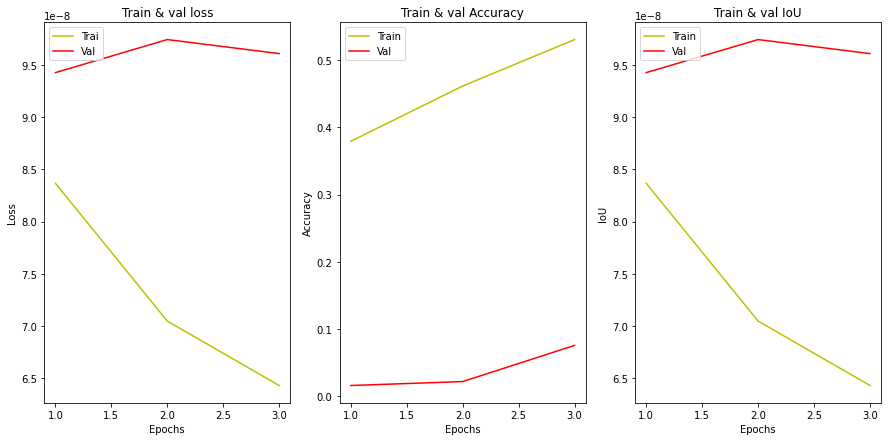

In [36]:
x = runs_aug.iloc[8]
mod = sm.Unet
backbone = 'vgg16'
los =   jaccard_distance

preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                 
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [37]:
del model,los,backbone

### Run 10 -AUG

--------------------------------------------------------------------------------------------------------
run                                      28
Data_gen                              Image
Model                                   FPN
BACKBONE                           resnet18
Loss        sparse_categorical_crossentropy
Name: 27, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   28      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : resnet18   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 37s 778ms/step - loss: 4.9526 - iou_score: 0.1524 - sparse_categorical_accuracy: 0.3752 - val_loss: 42185916416.0000 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 0.0567
Epoch 2/15
39/39 [==============================] - 32s 827ms/step - loss: 1

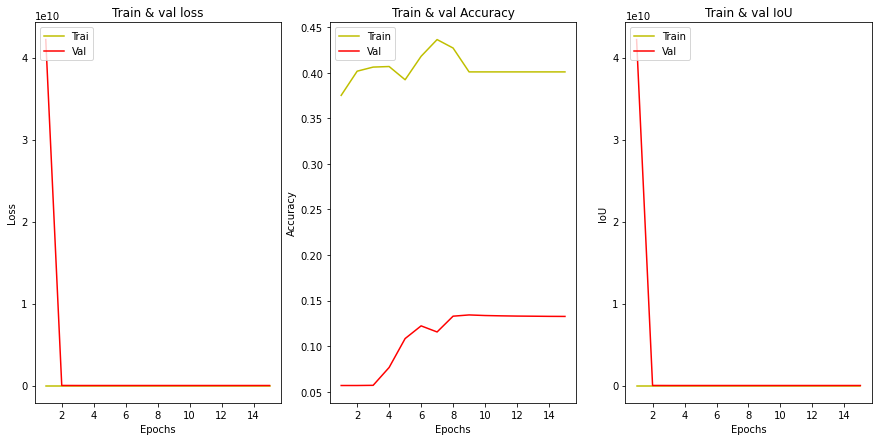

In [38]:
x = runs_aug.iloc[9]
mod = sm.FPN
backbone = 'resnet18'
los =   'sparse_categorical_crossentropy'

preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                 
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [39]:
del model,los,backbone

### Run 11 -AUG

--------------------------------------------------------------------------------------------------------
run                                                      29
Data_gen                                              Image
Model                                                   FPN
BACKBONE                                           resnet18
Loss        <function dice_coef_cat_loss at 0x7f003d3d6050>
Name: 28, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   29      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : resnet18   Loss_function  : <function dice_coef_cat_loss at 0x7f003d3d6050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 34s 788ms/step - loss: 0.5968 - iou_score: 0.2761 - sparse_categorical_accuracy: 0.3925 - val_loss: 0.8673 - val_iou_score: 0.0895 - val_sparse_categorical_accurac

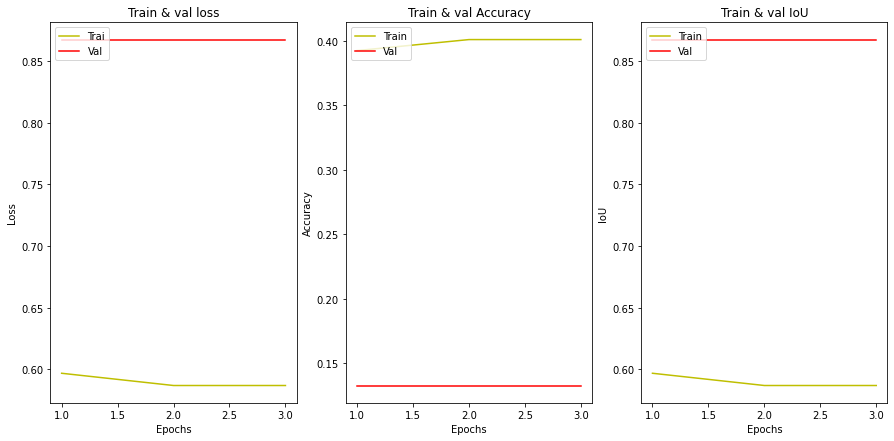

In [40]:
x = runs_aug.iloc[10]
mod = sm.FPN
backbone = 'resnet18'
los =   dice_coef_cat_loss 

preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                 
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [41]:
del model,los,backbone

### Run 12 -AUG

--------------------------------------------------------------------------------------------------------
run                                                    30
Data_gen                                            Image
Model                                                 FPN
BACKBONE                                         resnet18
Loss        <function jaccard_distance at 0x7f003d3d6170>
Name: 29, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   30      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : resnet18   Loss_function  : <function jaccard_distance at 0x7f003d3d6170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 34s 782ms/step - loss: 7.7438e-08 - iou_score: 0.1894 - sparse_categorical_accuracy: 0.3663 - val_loss: 9.3339e-08 - val_iou_score: 0.1494 - val_sparse_categorical_accuracy: 0

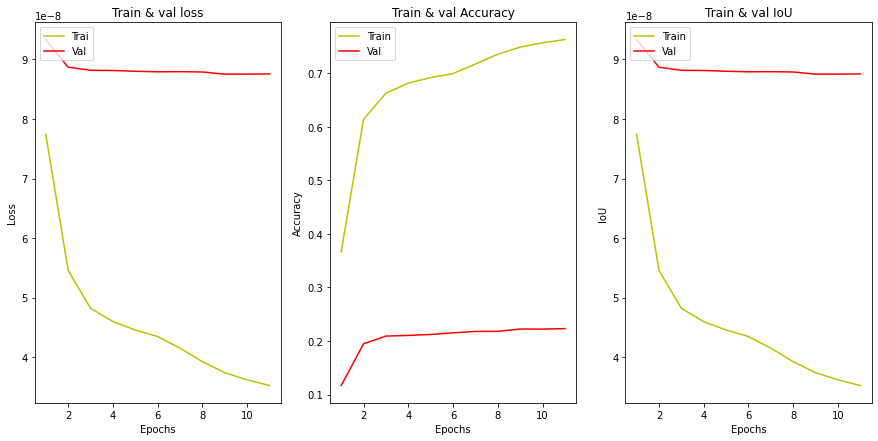

In [42]:
x = runs_aug.iloc[11]
mod = sm.FPN
backbone = 'resnet18'
los =   jaccard_distance   
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [43]:
del model,los,backbone

### Run 13 -AUG

--------------------------------------------------------------------------------------------------------
run                                      31
Data_gen                              Image
Model                                   FPN
BACKBONE                           resnet34
Loss        sparse_categorical_crossentropy
Name: 30, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   31      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : resnet34   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 37s 802ms/step - loss: 4.8321 - iou_score: 0.1528 - sparse_categorical_accuracy: 0.3815 - val_loss: 61389672663744512.0000 - val_iou_score: 0.0895 - val_sparse_categorical_accuracy: 0.1327
Epoch 2/15
39/39 [==============================] - 29s 729ms/step - l

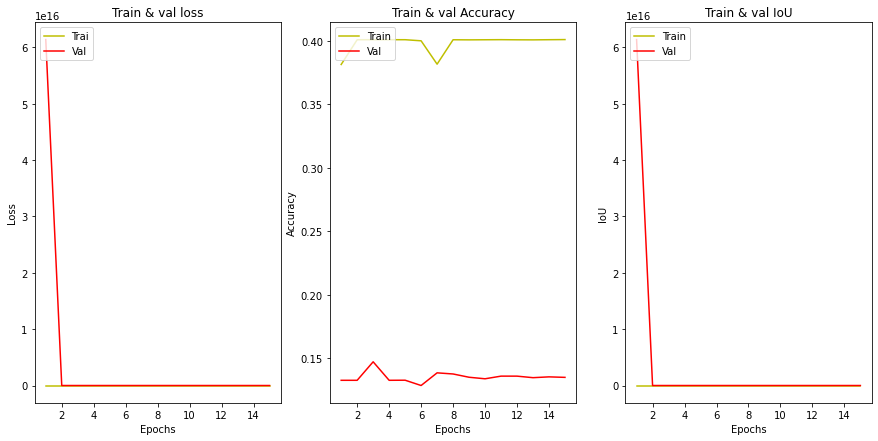

In [44]:
x = runs_aug.iloc[12]
mod = sm.FPN
backbone = 'resnet34'
los =   'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [45]:
del model,los,backbone

### Run 14 -AUG

--------------------------------------------------------------------------------------------------------
run                                                      32
Data_gen                                              Image
Model                                                   FPN
BACKBONE                                           resnet34
Loss        <function dice_coef_cat_loss at 0x7f003d3d6050>
Name: 31, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   32      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : resnet34   Loss_function  : <function dice_coef_cat_loss at 0x7f003d3d6050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 36s 766ms/step - loss: 0.7714 - iou_score: 0.2795 - sparse_categorical_accuracy: 0.2045 - val_loss: 0.9433 - val_iou_score: 0.0895 - val_sparse_categorical_accurac

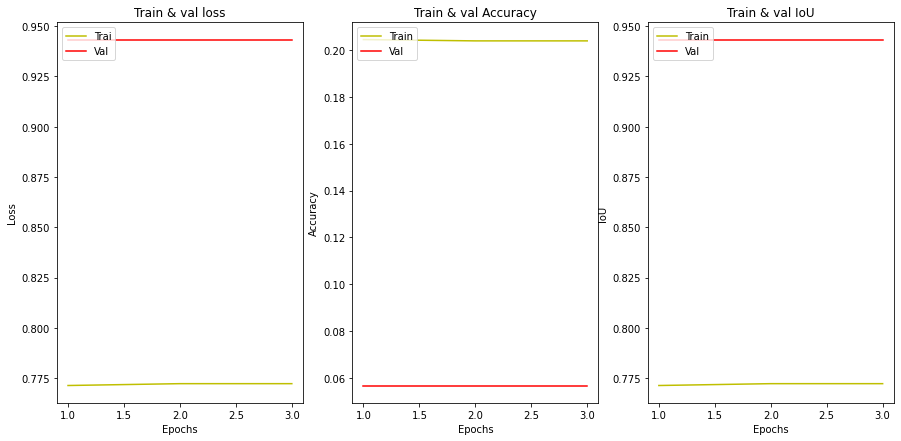

In [46]:
x = runs_aug.iloc[13]
mod = sm.FPN
backbone = 'resnet34'
los =   dice_coef_cat_loss
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [47]:
del model,los,backbone

### Run 15 -AUG

--------------------------------------------------------------------------------------------------------
run                                                    33
Data_gen                                            Image
Model                                                 FPN
BACKBONE                                         resnet34
Loss        <function jaccard_distance at 0x7f003d3d6170>
Name: 32, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   33      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : resnet34   Loss_function  : <function jaccard_distance at 0x7f003d3d6170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 36s 798ms/step - loss: 7.0306e-08 - iou_score: 0.1718 - sparse_categorical_accuracy: 0.4565 - val_loss: 9.0145e-08 - val_iou_score: 0.1433 - val_sparse_categorical_accuracy: 0

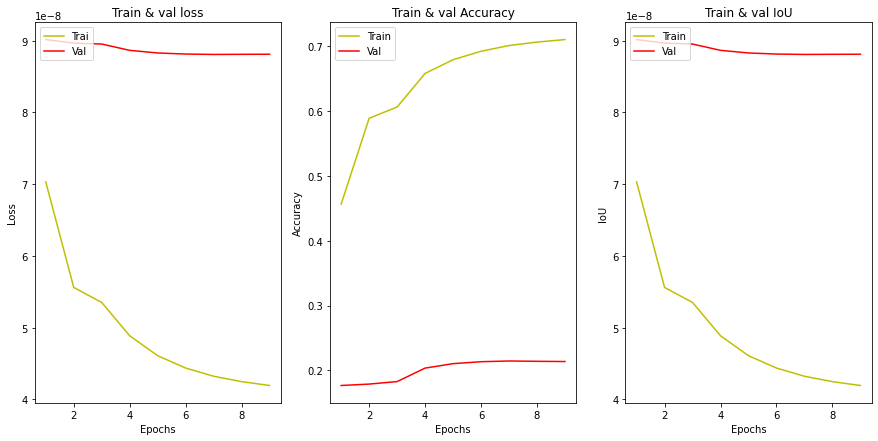

In [48]:
x = runs_aug.iloc[14]
mod = sm.FPN
backbone = 'resnet34'
los =   jaccard_distance
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [49]:
del model,los,backbone

### Run 16 -AUG

--------------------------------------------------------------------------------------------------------
run                                      34
Data_gen                              Image
Model                                   FPN
BACKBONE                              vgg16
Loss        sparse_categorical_crossentropy
Name: 33, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   34      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : vgg16   Loss_function  : sparse_categorical_crossentropy
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 757ms/step - loss: nan - iou_score: nan - sparse_categorical_accuracy: 0.0741 - val_loss: nan - val_iou_score: nan - val_sparse_categorical_accuracy: 0.7125
Epoch 2/15
39/39 [==============================] - 30s 767ms/step - loss: nan - iou_score: nan - spa

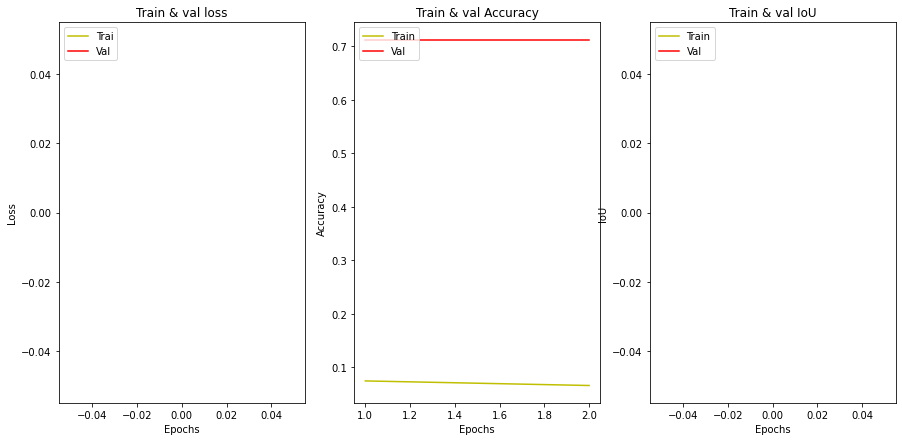

In [50]:
x = runs_aug.iloc[15]
mod = sm.FPN
backbone = 'vgg16'
los =   'sparse_categorical_crossentropy'
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))               
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [51]:
del model,los,backbone

### Run 17 -AUG

--------------------------------------------------------------------------------------------------------
run                                                      35
Data_gen                                              Image
Model                                                   FPN
BACKBONE                                              vgg16
Loss        <function dice_coef_cat_loss at 0x7f003d3d6050>
Name: 34, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   35      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : vgg16   Loss_function  : <function dice_coef_cat_loss at 0x7f003d3d6050>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 33s 791ms/step - loss: nan - iou_score: nan - sparse_categorical_accuracy: 0.0752 - val_loss: nan - val_iou_score: nan - val_sparse_categorical_accuracy: 0.7125
Epoch

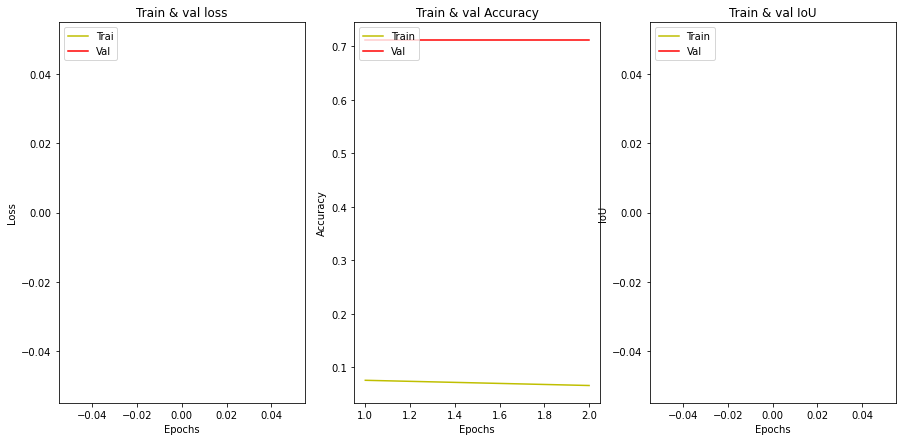

In [52]:
x = runs_aug.iloc[16]
mod = sm.FPN
backbone = 'vgg16'
los =   dice_coef_cat_loss
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))                
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [53]:
del model,los,backbone

### Run 18 -AUG

--------------------------------------------------------------------------------------------------------
run                                                    36
Data_gen                                            Image
Model                                                 FPN
BACKBONE                                            vgg16
Loss        <function jaccard_distance at 0x7f003d3d6170>
Name: 35, dtype: object
--------------------------------------------------------------------------------------------------------
Run N:   36      Data generator  : WITH_AUG
Model : FPN   BACKBONE  : vgg16   Loss_function  : <function jaccard_distance at 0x7f003d3d6170>
--------------------------------------------------------------------------------------------------------
Epoch 1/15
39/39 [==============================] - 32s 766ms/step - loss: 6.2701e-08 - iou_score: 0.1478 - sparse_categorical_accuracy: 0.5463 - val_loss: 8.6293e-08 - val_iou_score: 0.1540 - val_sparse_categorical_accuracy: 0.19

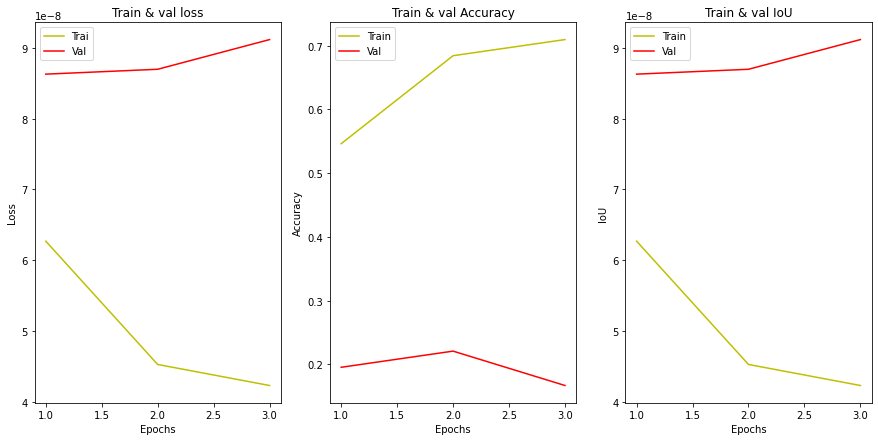

In [54]:
x = runs_aug.iloc[17]
mod = sm.FPN
backbone = 'vgg16'
los =   jaccard_distance
preprocess_input = sm.get_preprocessing(backbone)
# Generate train and val sequences

# Define strat time
start_time = datetime.now() 
# Order on dataframe for check purposes
print('--------------------------------------------------------------------------------------------------------')
print(x)
print('--------------------------------------------------------------------------------------------------------')
# Define model           
model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3),activation='softmax')
print('Run N:  ',x[0],'    ','Data generator  :','WITH_AUG')
# Compile model
model.compile(opt_Adam,loss=los, metrics=metrics)
print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
print('--------------------------------------------------------------------------------------------------------')
# Fit Model
history = model.fit(train_seq, epochs=15, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
print('\n') 
# Evaluate model on test data
print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
end_time = datetime.now()
print('Execution Duration: {}'.format(end_time - start_time))
print('Epochs run total :',len(history.history['loss']))               
# Print 'train' results
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams["figure.figsize"] = (20,8)
#fig.suptitle('Vertically stacked subplots')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Trai')
ax1.plot(epochs, val_loss, 'r', label='Val')
ax1.set_title('Train & val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
ax2.plot(epochs, acc, 'y', label='Train')                    
ax2.plot(epochs, val_acc, 'r', label='Val')
ax2.set_title('Train & val Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)
                    
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
ax3.plot(epochs, loss, 'y', label='Train')
ax3.plot(epochs, val_loss, 'r', label='Val')
ax3.set_title('Train & val IoU')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('IoU')
ax3.legend(loc='upper left')
fig.set_figheight(7)
fig.set_figwidth(15)                    

#plt.subplots_adjust(wspace=5)
#fig.tightlayout()
plt.show()        

In [55]:
del model,los,backbone,train_seq,val_seq

In [56]:
-----------------

SyntaxError: ignored

# Annexe :

### Global Loop for Models Not used for memory and CPU issues

In [ ]:
'''
i=1
test_seq = Image_no_aug(batch_size, img_size, test_img_paths, test_ann_paths)
for data in Data_gen:
    # Generate train and val sequences
    train_seq = data(batch_size, img_size, train_img_paths, train_ann_paths)
    val_seq = data(batch_size, img_size, val_img_paths, val_ann_paths)
    print('train set shape   :',train_seq[0][0].shape)
    print('target set shape  :',train_seq[0][1].shape)
    print('-----------------------------------------')
    #Quick verif
    assert train_seq[0][0].shape == (batch_size * imgaug_multiplier, *img_size, 3)
    assert train_seq[0][1].shape == (batch_size * imgaug_multiplier, *img_size, 1)
    
    for backbone in BACKBONE_LIST:
            preprocess_input = sm.get_preprocessing(backbone)
            for los in loss_list:
                for mod in Models_list:
                    # Define strat time
                    start_time = datetime.now() 
                    # Define model           
                    model = mod(backbone, encoder_weights='imagenet', classes=n_classes ,  input_shape=(*img_size, 3))
                    print('Run N:  ',i,'    ','Data generator  :',data.__name__)
                    # Compile model
                    model.compile(opt_Adam,loss=los, metrics=metrics)
                    print('Model :',mod.__name__,' ','BACKBONE  :',backbone,' ','Loss_function  :',los)
                    print('--------------------------------------------------------------------------------------------------------')
                    # Fit Model
                    history = model.fit(train_seq, epochs=30, batch_size=batch_size, callbacks=callbacks,validation_data=val_seq,verbose=1) #callbacks=callbacks
                    print('\n') 
                    # Evaluate model on test data
                    print('Results on test sequence   :{}'.format(model.evaluate(test_seq,batch_size=batch_size)))
                    end_time = datetime.now()
                    print('Run N° :{}'.format(i),'  ','Execution Duration: {}'.format(end_time - start_time))                 
                    # Print 'train' results
                    fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
                    #plt.rcParams["figure.figsize"] = (20,8)
                    #fig.suptitle('Vertically stacked subplots')

                    #plot the training and validation accuracy and loss at each epoch
                    loss = history.history['loss']
                    val_loss = history.history['val_loss']
                    epochs = range(1, len(loss) + 1)
                    ax1.plot(epochs, loss, 'y', label='Trai')
                    ax1.plot(epochs, val_loss, 'r', label='Val')
                    ax1.set_title('Train & val loss')
                    ax1.set_xlabel('Epochs')
                    ax1.set_ylabel('Loss')
                    ax1.legend(loc='upper left')
                    fig.set_figheight(7)
                    fig.set_figwidth(15)

                    acc = history.history['sparse_categorical_accuracy']
                    val_acc = history.history['val_sparse_categorical_accuracy']
                    ax2.plot(epochs, acc, 'y', label='Train')
                    ax2.plot(epochs, val_acc, 'r', label='Val')
                    ax2.set_title('Train & val Accuracy')
                    ax2.set_xlabel('Epochs')
                    ax2.set_ylabel('Accuracy')
                    ax2.legend(loc='upper left')
                    fig.set_figheight(7)
                    fig.set_figwidth(15)
                    
                    iou = history.history['iou_score']
                    val_iou = history.history['val_iou_score']
                    epochs = range(1, len(loss) + 1)
                    ax3.plot(epochs, loss, 'y', label='Train')
                    ax3.plot(epochs, val_loss, 'r', label='Val')
                    ax3.set_title('Train & val IoU')
                    ax3.set_xlabel('Epochs')
                    ax3.set_ylabel('IoU')
                    ax3.legend(loc='upper left')
                    fig.set_figheight(7)
                    fig.set_figwidth(15)

                    #plt.subplots_adjust(wspace=5)
                    #fig.tightlayout()
                    plt.show()   
                                       
                    #Delete model to free memory and use a complete new model
                    del model
                    i=i+1 
                    print('\n')        
'''